In [2]:
import json
import pandas as pd
import networkx as nx
import seaborn as sns
from scipy import stats
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
!pip install vaderSentiment

In [4]:
!pip install pyvis


In [5]:
with open('./data/output.json', 'r') as file:
    data = json.load(file)

In [6]:
# Collect unique keys

all_keys = set()
for item in data:
  if 'data' in item:
    all_keys.update(item['data'].keys())

print("Unique keys in the 'data': ", all_keys)
print("Number of unique keys: ", len(all_keys))

Unique keys in the 'data':  {'author_flair_background_color', 'author_flair_text', 'score', 'thumbnail', 'author_flair_text_color', 'author_flair_template_id', 'url', 'mod_note', 'thumbnail_height', 'content_categories', 'archived', 'gilded', 'preview', 'author_flair_css_class', 'report_reasons', 'created_utc', 'discussion_type', 'domain', 'media_embed', 'treatment_tags', 'visited', 'over_18', 'distinguished', 'author_patreon_flair', 'suggested_sort', 'pwls', 'author_fullname', 'subreddit_type', 'num_crossposts', 'author_flair_type', 'created', 'id', 'link_flair_css_class', 'link_flair_background_color', 'media', 'author_premium', 'banned_at_utc', 'title', 'name', 'is_original_content', 'author_is_blocked', 'num_comments', 'link_flair_text', 'permalink', 'link_flair_richtext', 'send_replies', 'stickied', 'view_count', 'hidden', 'ups', 'crosspost_parent_list', 'top_awarded_type', 'approved_at_utc', 'is_video', 'upvote_ratio', 'all_awardings', 'can_gild', 'url_overridden_by_dest', 'link_

In [7]:
# Define the filter function
def filter_columns(df, prefixes_to_exclude):
    """
    Filters out columns from the DataFrame that start with any of the specified prefixes.

    Parameters:
    - df (pd.DataFrame): The DataFrame to filter.
    - prefixes_to_exclude (list of str): List of prefixes to exclude.

    Returns:
    - pd.DataFrame: A new DataFrame with the undesired columns removed.
    """
    columns_to_keep = [col for col in df.columns if not any(col.startswith(prefix) for prefix in prefixes_to_exclude)]
    return df[columns_to_keep]

In [8]:
# Flatten the main data into a DataFrame
df = pd.json_normalize([item['data'] for item in data], sep='_')

# prefixes to exclude
prefixes_to_exclude = ['media_metadata', 'media_metadata_', 'secure_media_oembed_thumbnail_height', 'secure_media_oembed_thumbnail_width', 'secure_media_oembed_width', 'secure_media_oembed_height', 'secure_media_embed_width', 'secure_media_embed_height', 'secure_media_embed_scrolling',
                        'author_flair_background_color', 'link_flair_text_color', 'link_flair_css_class', 'thumbnail_width', 'author_flair_css_class', 'thumbnail_height', 'author_flair_text_color', 'link_flair_template_id', 'link_flair_background_color',
                          'author_flair_template_id', 'media_oembed_thumbnail_width', 'media_oembed_height', 'media_oembed_width', 'media_oembed_thumbnail_height']

# Filter the main DataFrame
df_filtered = filter_columns(df, prefixes_to_exclude)
print('Columns in filtered main dataframe: ', df_filtered.columns.tolist())
print('Shape of the filtered main dataframe', df_filtered.shape)

Columns in filtered main dataframe:  ['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'downs', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'upvote_ratio', 'subreddit_type', 'ups', 'total_awards_received', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'is_created_from_ads_ui', 'author_premium', 'thumbnail', 'edited', 'author_flair_richtext', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'view_count', 'archived', 'no_follow', 'is_crosspostable', 'pinned', 'over_18', 'all_awardings', 'awarders', 'media_only', 'can_gild', 'spoiler', 'locked

In [9]:
# Extract and flatten crossposts
crossposts = []
for i, item in enumerate(data):
    if 'crosspost_parent_list' in item['data'] and item['data']['crosspost_parent_list']:
        for cp in item['data']['crosspost_parent_list']:
            cp['parent_id'] = item['data']['id']
            crossposts.append(cp)
crossposts_df = pd.json_normalize(crossposts)

# prefixes to exclude
prefixes_to_exclude = ['media_metadata_', 'media_metadata', 'secure_media.oembed.thumbnail_height', 'secure_media.oembed.thumbnail_width', 'secure_media.oembed.width', 'secure_media.oembed.height', 'secure_media_embed.width', 'secure_media_embed.height', 'secure_media_embed.scrolling',
                        'author_flair_background_color', 'link_flair_text_color', 'link_flair_css_class', 'thumbnail_width', 'author_flair_css_class', 'thumbnail_height', 'author_flair_text_color', 'link_flair_template_id', 'link_flair_background_color',
                        'author_flair_template_id', 'media_embed.width', 'media_embed.scrolling', 'media_embed.height',  'media.oembed.thumbnail_width', 'media.oembed.height', 'media.oembed.width']


# Filter the crossposts DataFrame
crossposts_df_filtered = filter_columns(crossposts_df, prefixes_to_exclude)
print('Columns in filtered crossposts dataframe: ', crossposts_df_filtered.columns.tolist())
print('Shape of the filtered crossposts dataframe', crossposts_df_filtered.shape)

Columns in filtered crossposts dataframe:  ['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'downs', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'upvote_ratio', 'subreddit_type', 'ups', 'total_awards_received', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'is_created_from_ads_ui', 'author_premium', 'thumbnail', 'edited', 'author_flair_richtext', 'post_hint', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'url_overridden_by_dest', 'view_count', 'archived', 'no_follow', 'is_crosspostable', 'pinned', 'over_18', 'all_awardings', 'awarders',

## Understand the data

In [10]:
print("Missing values per column:\n", df_filtered.isnull().sum())
print("Basic statistics:\n", df_filtered.describe())

Missing values per column:
 approved_at_utc                                    8799
subreddit                                             0
selftext                                              0
author_fullname                                     120
saved                                                 0
                                                   ... 
preview_reddit_video_preview_dash_url              8791
preview_reddit_video_preview_duration              8791
preview_reddit_video_preview_hls_url               8791
preview_reddit_video_preview_is_gif                8791
preview_reddit_video_preview_transcoding_status    8791
Length: 167, dtype: int64
Basic statistics:
        gilded         pwls   downs  upvote_ratio           ups  \
count  8799.0  6836.000000  8799.0   8799.000000   8799.000000   
mean      0.0     6.576653     0.0      0.861548    388.866348   
std       0.0     0.494126     0.0      0.163544   1886.171342   
min       0.0     6.000000     0.0      0.05000

## Visualize missing data

In [11]:
# Calculate missing values and related metrics

missing_values = df_filtered.isnull().sum()  # Count of missing values per column
total_rows = len(df_filtered)  # Total number of rows in the DataFrame
non_missing_values = total_rows - missing_values  # Count of non-missing values per column
missing_percentage = (missing_values / total_rows) * 100  # Percentage of missing values per column

missing_summary = pd.DataFrame({
    'Column Name': missing_values.index,
    'Missing Values': missing_values.values,
    'Non-Missing Values': non_missing_values.values,
    'Total Occurrences': total_rows,
    'Percentage Missing': missing_percentage.values
})

missing_summary_sorted = missing_summary.sort_values(by='Percentage Missing', ascending=True)

print("Detailed Missing Values Report for All Columns:\n")
print(missing_summary_sorted.to_string(index=False))

fig = px.bar(missing_summary_sorted,
             y='Column Name',
             x='Percentage Missing',
             orientation='h',
             title='Percentage of Missing Values per Column',
             labels={'Column Name': 'Columns', 'Percentage Missing': 'Percentage Missing (%)'},
             height=1000)

fig.update_traces(hovertemplate='Column: %{y}<br>Percentage Missing: %{x:.2f}%')

fig.show()

Detailed Missing Values Report for All Columns:

                                    Column Name  Missing Values  Non-Missing Values  Total Occurrences  Percentage Missing
                                      subreddit               0                8799               8799            0.000000
                                       selftext               0                8799               8799            0.000000
                                         gilded               0                8799               8799            0.000000
                                          saved               0                8799               8799            0.000000
                                        clicked               0                8799               8799            0.000000
                        subreddit_name_prefixed               0                8799               8799            0.000000
                            link_flair_richtext               0                8799       

In [12]:
# Calculate missing values and related metrics
crossposts_missing_values = crossposts_df_filtered.isnull().sum()
crossposts_total_rows = len(crossposts_df_filtered)
crossposts_non_missing_values = crossposts_total_rows - crossposts_missing_values
crossposts_missing_percentage = (crossposts_missing_values / crossposts_total_rows) * 100

crossposts_missing_summary = pd.DataFrame({
    'Column Name': crossposts_missing_values.index,
    'Missing Values': crossposts_missing_values.values,
    'Non-Missing Values': crossposts_non_missing_values.values,
    'Total Occurrences': crossposts_total_rows,
    'Percentage Missing': crossposts_missing_percentage.values
})

crossposts_missing_summary_sorted = crossposts_missing_summary.sort_values(by='Percentage Missing', ascending=True)

print("Detailed Missing Values Report for Crossposts DataFrame:\n")
print(crossposts_missing_summary_sorted.to_string(index=False))

fig = px.bar(crossposts_missing_summary_sorted,
             y='Column Name', 
             x='Percentage Missing', 
             orientation='h', 
             title='Percentage of Missing Values per Column in Crossposts DataFrame',
             labels={'Column Name': 'Columns', 'Percentage Missing': 'Percentage Missing (%)'},
             height=1000)

fig.update_traces(hovertemplate='Column: %{y}<br>Percentage Missing: %{x:.2f}%')

fig.show()

Detailed Missing Values Report for Crossposts DataFrame:

                                 Column Name  Missing Values  Non-Missing Values  Total Occurrences  Percentage Missing
                                   subreddit               0                 237                237            0.000000
                                    selftext               0                 237                237            0.000000
                                      gilded               0                 237                237            0.000000
                                       saved               0                 237                237            0.000000
                                     clicked               0                 237                237            0.000000
                     subreddit_name_prefixed               0                 237                237            0.000000
                         link_flair_richtext               0                 237                237   

## Remove unnecessary data

In [13]:
# List of columns to keep under specified categories
columns_to_keep = [
    # Core Post Information
    'subreddit', 'title', 'selftext', 'author', 'created_utc', 'id', 'permalink',
    'subreddit_id', 'subreddit_subscribers',

    # Engagement Metrics
    'ups', 'downs', 'score', 'upvote_ratio', 'num_comments', 'total_awards_received',
    'num_crossposts',

    # Content Type Indicators
    'is_self', 'is_video', 'domain', 'url',

    # Author Information
    'author_fullname', 'author_flair_type', 'author_premium', 'author_patreon_flair',
    'author_flair_richtext',

    # Crossposting Links
    'crosspost_parent', 'crosspost_parent_list',

    # Conditional Keep (Low to Moderate Missing)
    'url_overridden_by_dest', 'post_hint', 'preview_images', 'preview_enabled',
    'pwls', 'wls'
]

# List of columns to remove (100% missing, >90% missing, low relevance)
columns_to_remove = [
    # 100% Missing
    'mod_reason_title', 'top_awarded_type', 'secure_media', 'category', 'approved_by',
    'content_categories', 'mod_note', 'banned_by', 'banned_at_utc', 'view_count',
    'removed_by', 'num_reports', 'mod_reason_by', 'report_reasons', 'discussion_type',
    'media', 'likes', 'approved_at_utc',

    # High Missing Values (>90%)
    'media_metadata', 'secure_media_embed', 'media_oembed_provider_url',
    'media_oembed_type', 'media_oembed_html', 'media_oembed_author_name',
    'media_oembed_author_url', 'media_oembed_title', 'media_oembed_version',
    'media_oembed_thumbnail_url', 'secure_media_reddit_video_hls_url',
    'secure_media_reddit_video_bitrate_kbps', 'secure_media_reddit_video_fallback_url',
    'secure_media_reddit_video_has_audio', 'secure_media_reddit_video_height',
    'secure_media_reddit_video_width', 'secure_media_reddit_video_scrubber_media_url',
    'secure_media_reddit_video_is_gif', 'media_reddit_video_hls_url',
    'media_reddit_video_is_gif', 'media_reddit_video_dash_url',
    'media_reddit_video_scrubber_media_url', 'secure_media_reddit_video_dash_url',
    'media_reddit_video_transcoding_status', 'media_reddit_video_width',
    'media_reddit_video_height', 'media_reddit_video_duration',
    'media_reddit_video_has_audio', 'secure_media_reddit_video_duration',
    'media_reddit_video_fallback_url', 'media_reddit_video_bitrate_kbps',
    'gallery_data_items', 'is_gallery', 'author_cakeday', 'distinguished',
    'removal_reason', 'removed_by_category',

    # Low Relevance
    'thumbnail', 'edited', 'send_replies', 'contest_mode', 'locked', 'pinned',
    'over_18', 'visited', 'hidden', 'saved', 'clicked', 'gilded', 'stickied',
    'archived', 'no_follow', 'is_crosspostable', 'can_gild', 'media_only',
    'allow_live_comments', 'treatment_tags', 'quarantine', 'hide_score'
]

columns_to_remove = [col for col in columns_to_remove if col in df_filtered.columns]

df_filtered = df_filtered.drop(columns=columns_to_remove)

df_filtered = df_filtered[columns_to_keep]

print("Remaining columns after filtering:", df_filtered.columns.tolist())
print("Shape of the filtered DataFrame:", df_filtered.shape)

Remaining columns after filtering: ['subreddit', 'title', 'selftext', 'author', 'created_utc', 'id', 'permalink', 'subreddit_id', 'subreddit_subscribers', 'ups', 'downs', 'score', 'upvote_ratio', 'num_comments', 'total_awards_received', 'num_crossposts', 'is_self', 'is_video', 'domain', 'url', 'author_fullname', 'author_flair_type', 'author_premium', 'author_patreon_flair', 'author_flair_richtext', 'crosspost_parent', 'crosspost_parent_list', 'url_overridden_by_dest', 'post_hint', 'preview_images', 'preview_enabled', 'pwls', 'wls']
Shape of the filtered DataFrame: (8799, 33)


In [14]:
# Calculate missing values and related metrics
missing_values = df_filtered.isnull().sum()
total_rows = len(df_filtered)
non_missing_values = total_rows - missing_values 
missing_percentage = (missing_values / total_rows) * 100

missing_summary = pd.DataFrame({
    'Column Name': missing_values.index,
    'Missing Values': missing_values.values,
    'Non-Missing Values': non_missing_values.values,
    'Total Occurrences': total_rows,
    'Percentage Missing': missing_percentage.values
})

missing_summary_sorted = missing_summary.sort_values(by='Percentage Missing', ascending=True)

print("Detailed Missing Values Report for All Columns:\n")
print(missing_summary_sorted.to_string(index=False))

fig = px.bar(missing_summary_sorted,
             y='Column Name',
             x='Percentage Missing',
             orientation='h',
             title='Percentage of Missing Values per Column',
             labels={'Column Name': 'Columns', 'Percentage Missing': 'Percentage Missing (%)'},
             height=1000)

fig.update_traces(hovertemplate='Column: %{y}<br>Percentage Missing: %{x:.2f}%')

fig.show()

Detailed Missing Values Report for All Columns:

           Column Name  Missing Values  Non-Missing Values  Total Occurrences  Percentage Missing
             subreddit               0                8799               8799            0.000000
                 title               0                8799               8799            0.000000
              selftext               0                8799               8799            0.000000
                author               0                8799               8799            0.000000
           created_utc               0                8799               8799            0.000000
                    id               0                8799               8799            0.000000
             permalink               0                8799               8799            0.000000
          subreddit_id               0                8799               8799            0.000000
 subreddit_subscribers               0                8799           

In [15]:
# List of columns to keep based on the specified categories
columns_to_keep = [
    # Core Post Information
    'subreddit', 'title', 'selftext', 'author', 'created_utc', 'id', 'permalink', 'parent_id',
    'subreddit_id', 'subreddit_subscribers',

    # Engagement Metrics
    'ups', 'downs', 'score', 'upvote_ratio', 'num_comments', 'total_awards_received',
    'num_crossposts',

    # Content Type Indicators
    'is_self', 'is_video', 'domain', 'url',

    # Author Information
    'author_fullname', 'author_flair_type', 'author_premium', 'author_patreon_flair',
    'author_flair_richtext',

    # Conditional Keep
    'url_overridden_by_dest', 'post_hint', 'preview.enabled', 'preview.images',
    'pwls', 'wls'
]

# List of columns to remove based on missing data and relevance
columns_to_remove = [
    # 100% Missing
    'mod_reason_title', 'top_awarded_type', 'secure_media', 'category', 'approved_by',
    'mod_note', 'banned_by', 'likes', 'banned_at_utc', 'view_count', 'removed_by',
    'num_reports', 'media', 'mod_reason_by', 'removal_reason', 'report_reasons',
    'gallery_data', 'approved_at_utc', 'discussion_type',

    # High Missing Values (>90%)
    'secure_media.reddit_video.scrubber_media_url', 'media.reddit_video.height',
    'secure_media.reddit_video.hls_url', 'media.reddit_video.has_audio',
    'media.reddit_video.hls_url', 'media.reddit_video.width',
    'media.reddit_video.fallback_url', 'media.reddit_video.bitrate_kbps',
    'secure_media.reddit_video.duration', 'secure_media.reddit_video.transcoding_status',
    'secure_media.reddit_video.bitrate_kbps', 'media.reddit_video.dash_url',
    'secure_media.reddit_video.fallback_url', 'media.reddit_video.duration',
    'secure_media.reddit_video.has_audio', 'secure_media.reddit_video.height',
    'secure_media.reddit_video.is_gif', 'secure_media.reddit_video.width',
    'secure_media.reddit_video.dash_url', 'media.reddit_video.scrubber_media_url',
    'media.reddit_video.transcoding_status', 'media.reddit_video.is_gif',
    'media.oembed.provider_url', 'media.oembed.type', 'media.oembed.thumbnail_url',
    'secure_media.oembed.provider_url', 'secure_media.oembed.type',
    'secure_media.oembed.thumbnail_url', 'media_embed.content',
    'secure_media_embed.content', 'removed_by_category', 'is_gallery',
    'gallery_data.items', 'distinguished', 'content_categories',

    # Low Relevance
    'thumbnail', 'edited', 'send_replies', 'contest_mode', 'locked', 'pinned',
    'over_18', 'visited', 'hidden', 'saved', 'clicked', 'gilded', 'stickied',
    'archived', 'no_follow', 'is_crosspostable', 'can_gild', 'media_only',
    'allow_live_comments', 'treatment_tags', 'quarantine', 'hide_score'
]

columns_to_remove = [col for col in columns_to_remove if col in crossposts_df_filtered.columns]

crossposts_df_filtered = crossposts_df_filtered.drop(columns=columns_to_remove)

crossposts_df_filtered = crossposts_df_filtered[columns_to_keep]

print("Remaining columns after filtering:", crossposts_df_filtered.columns.tolist())
print("Shape of the filtered DataFrame:", crossposts_df_filtered.shape)

Remaining columns after filtering: ['subreddit', 'title', 'selftext', 'author', 'created_utc', 'id', 'permalink', 'parent_id', 'subreddit_id', 'subreddit_subscribers', 'ups', 'downs', 'score', 'upvote_ratio', 'num_comments', 'total_awards_received', 'num_crossposts', 'is_self', 'is_video', 'domain', 'url', 'author_fullname', 'author_flair_type', 'author_premium', 'author_patreon_flair', 'author_flair_richtext', 'url_overridden_by_dest', 'post_hint', 'preview.enabled', 'preview.images', 'pwls', 'wls']
Shape of the filtered DataFrame: (237, 32)


In [16]:
# Calculate missing values and related metrics
crossposts_missing_values = crossposts_df_filtered.isnull().sum()
crossposts_total_rows = len(crossposts_df_filtered)
crossposts_non_missing_values = crossposts_total_rows - crossposts_missing_values
crossposts_missing_percentage = (crossposts_missing_values / crossposts_total_rows) * 100

crossposts_missing_summary = pd.DataFrame({
    'Column Name': crossposts_missing_values.index,
    'Missing Values': crossposts_missing_values.values,
    'Non-Missing Values': crossposts_non_missing_values.values,
    'Total Occurrences': crossposts_total_rows,
    'Percentage Missing': crossposts_missing_percentage.values
})

crossposts_missing_summary_sorted = crossposts_missing_summary.sort_values(by='Percentage Missing', ascending=True)

print("Detailed Missing Values Report for Crossposts DataFrame:\n")
print(crossposts_missing_summary_sorted.to_string(index=False))

fig = px.bar(crossposts_missing_summary_sorted,
             y='Column Name',  
             x='Percentage Missing',
             orientation='h',
             title='Percentage of Missing Values per Column in Crossposts DataFrame',
             labels={'Column Name': 'Columns', 'Percentage Missing': 'Percentage Missing (%)'},
             height=1000)

fig.update_traces(hovertemplate='Column: %{y}<br>Percentage Missing: %{x:.2f}%')

fig.show()

Detailed Missing Values Report for Crossposts DataFrame:

           Column Name  Missing Values  Non-Missing Values  Total Occurrences  Percentage Missing
             subreddit               0                 237                237            0.000000
                 title               0                 237                237            0.000000
              selftext               0                 237                237            0.000000
                author               0                 237                237            0.000000
           created_utc               0                 237                237            0.000000
                    id               0                 237                237            0.000000
             permalink               0                 237                237            0.000000
             parent_id               0                 237                237            0.000000
          subreddit_id               0                 237  

## Handle missing values

In [17]:
def handle_missing_data(df):
    """
    Handles missing data in the DataFrame based on the content and purpose of each column.

    Parameters:
    - df (pd.DataFrame): The DataFrame to clean (either df_filtered or crossposts_df_filtered).

    Returns:
    - pd.DataFrame: The cleaned DataFrame with missing values handled appropriately.
    """

    # Drop rows with missing critical columns (essential for data integrity)
    critical_columns = ['id', 'created_utc', 'subreddit', 'author']
    df = df.dropna(subset=[col for col in critical_columns if col in df.columns])

    # Handle missing values for each column based on its content
    for column in df.columns:
        if column in ['title', 'selftext']:
            # Text content: fill with empty string to indicate no text
            df[column] = df[column].fillna("")

        elif column in ['ups', 'downs', 'score', 'num_comments', 'total_awards_received', 'num_crossposts']:
            # Engagement metrics: fill with 0, assuming no engagement if missing
            df[column] = df[column].fillna(0)

        elif column == 'upvote_ratio':
            # Upvote ratio: fill with median to preserve distribution
            df[column] = df[column].fillna(df[column].median())

        elif column in ['is_self', 'is_video', 'author_premium', 'author_patreon_flair']:
            # Boolean flags: fill with False, assuming absence if missing
            df[column] = df[column].fillna(False)

        elif column in ['domain', 'url', 'url_overridden_by_dest', 'post_hint', 'crosspost_parent', 'crosspost_parent_list']:
            # Links or categorical identifiers: fill with "none" to indicate no value
            df[column] = df[column].fillna("none")

        elif column in ['author_fullname', 'author_flair_type', 'author_flair_richtext']:
            # Author metadata: fill with "unknown" for missing details
            df[column] = df[column].fillna("unknown")

        elif column in ['preview_images', 'preview_enabled']:
            # Preview-related: fill with "none" or False based on context
            df[column] = df[column].fillna("none" if column == 'preview_images' else False)

        elif column in ['pwls', 'wls']:
            # Content warning levels: fill with 0 (assuming numerical scale)
            df[column] = df[column].fillna(0)

        elif column == 'parent_id':
            # Parent ID (possibly in crossposts_df_filtered): fill with "none" if missing
            df[column] = df[column].fillna("none")

        elif column == 'preview.enabled':
            df[column] = df[column].fillna(False)

        elif column == 'preview.images':
            df[column] = df[column].apply(lambda x: x if not pd.isna(x) else [])

    return df

df_filtered_cleaned = handle_missing_data(df_filtered)
crossposts_df_filtered_cleaned = handle_missing_data(crossposts_df_filtered)

print("Missing values in df_filtered after cleaning:\n", df_filtered_cleaned.isnull().sum())
print("\nMissing values in crossposts_df_filtered after cleaning:\n", crossposts_df_filtered_cleaned.isnull().sum())

Missing values in df_filtered after cleaning:
 subreddit                 0
title                     0
selftext                  0
author                    0
created_utc               0
id                        0
permalink                 0
subreddit_id              0
subreddit_subscribers     0
ups                       0
downs                     0
score                     0
upvote_ratio              0
num_comments              0
total_awards_received     0
num_crossposts            0
is_self                   0
is_video                  0
domain                    0
url                       0
author_fullname           0
author_flair_type         0
author_premium            0
author_patreon_flair      0
author_flair_richtext     0
crosspost_parent          0
crosspost_parent_list     0
url_overridden_by_dest    0
post_hint                 0
preview_images            0
preview_enabled           0
pwls                      0
wls                       0
dtype: int64

Missing values 

C:\Users\aryan\AppData\Local\Temp\ipykernel_16924\2050006698.py:32: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\aryan\AppData\Local\Temp\ipykernel_16924\2050006698.py:44: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\aryan\AppData\Local\Temp\ipykernel_16924\2050006698.py:32: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

## Combining ```df_filtered``` and ```crossposts_df_filtered```

In [18]:
# Merge the DataFrames
combined_df = df_filtered.merge(
    crossposts_df_filtered,
    left_on='id',
    right_on='parent_id',
    how='left',
    suffixes=('_original', '_crosspost')
)

# Fill missing crosspost data with placeholders
crosspost_columns = [col for col in combined_df.columns if '_crosspost' in col]
combined_df[crosspost_columns] = combined_df[crosspost_columns].fillna("no_crosspost")

In [19]:
# Verify the merge
print("Shape of combined_df:", combined_df.shape)
sample_crosspost = combined_df[combined_df['parent_id'].notna()].head(1)
print(sample_crosspost)

Shape of combined_df: (8799, 65)
  subreddit_original                                   title_original  \
1          Anarchism  "WTF is Social Ecology?" by Usufruct Collective   

  selftext_original     author_original  created_utc_original id_original  \
1                    NewMunicipalAgenda          1.739818e+09     1irrceg   

                                  permalink_original subreddit_id_original  \
1  /r/Anarchism/comments/1irrceg/wtf_is_social_ec...              t5_2qh5j   

   subreddit_subscribers_original  ups_original  ...  \
1                          275979            48  ...   

   author_flair_type_crosspost  author_premium_crosspost  \
1                         text                     False   

   author_patreon_flair_crosspost  author_flair_richtext_crosspost  \
1                           False                               []   

                    url_overridden_by_dest_crosspost  post_hint_crosspost  \
1  https://usufructcollective.wordpress.com/2025/...    

In [20]:
# Set display options to show all columns and widen the display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Shape of combined_df:", combined_df.shape)

# Get a sample of the crossposts where 'parent_id' is not missing
sample_crosspost = combined_df[combined_df['parent_id'].notna()].head(1)

for col, value in sample_crosspost.iloc[0].items():
    print(f"{col}: {value}")

Shape of combined_df: (8799, 65)
subreddit_original: Anarchism
title_original: "WTF is Social Ecology?" by Usufruct Collective
selftext_original: 
author_original: NewMunicipalAgenda
created_utc_original: 1739818025.0
id_original: 1irrceg
permalink_original: /r/Anarchism/comments/1irrceg/wtf_is_social_ecology_by_usufruct_collective/
subreddit_id_original: t5_2qh5j
subreddit_subscribers_original: 275979
ups_original: 48
downs_original: 0
score_original: 48
upvote_ratio_original: 0.96
num_comments_original: 2
total_awards_received_original: 0
num_crossposts_original: 0
is_self_original: False
is_video_original: False
domain_original: usufructcollective.wordpress.com
url_original: https://usufructcollective.wordpress.com/2025/02/17/wtf-is-social-ecology/
author_fullname_original: t2_4vt6saq5
author_flair_type_original: text
author_premium_original: False
author_patreon_flair_original: False
author_flair_richtext_original: []
crosspost_parent: t3_1irrbvc
crosspost_parent_list: [{'approved_

In [21]:
original_data = {}
crosspost_data = {}
other_data = {}

# Iterate over the row items and sort them into categories based on the key suffix
for col, value in sample_crosspost.iloc[0].items():
    if col.endswith('_original'):
        original_data[col] = value
    elif col.endswith('_crosspost'):
        crosspost_data[col] = value
    else:
        other_data[col] = value

print("Columns with '_original' suffix:")
for key, value in original_data.items():
    print(f"{key}: {value}")

print("\nColumns with '_crosspost' suffix:")
for key, value in crosspost_data.items():
    print(f"{key}: {value}")

print("\nColumns with no specified suffix:")
for key, value in other_data.items():
    print(f"{key}: {value}")

Columns with '_original' suffix:
subreddit_original: Anarchism
title_original: "WTF is Social Ecology?" by Usufruct Collective
selftext_original: 
author_original: NewMunicipalAgenda
created_utc_original: 1739818025.0
id_original: 1irrceg
permalink_original: /r/Anarchism/comments/1irrceg/wtf_is_social_ecology_by_usufruct_collective/
subreddit_id_original: t5_2qh5j
subreddit_subscribers_original: 275979
ups_original: 48
downs_original: 0
score_original: 48
upvote_ratio_original: 0.96
num_comments_original: 2
total_awards_received_original: 0
num_crossposts_original: 0
is_self_original: False
is_video_original: False
domain_original: usufructcollective.wordpress.com
url_original: https://usufructcollective.wordpress.com/2025/02/17/wtf-is-social-ecology/
author_fullname_original: t2_4vt6saq5
author_flair_type_original: text
author_premium_original: False
author_patreon_flair_original: False
author_flair_richtext_original: []
url_overridden_by_dest_original: https://usufructcollective.word

## Save intermediate JSON and CSV data

In [22]:
df_filtered.to_json('df_filtered.json', orient='records', lines=True)
crossposts_df_filtered.to_json('crossposts_df_filtered.json', orient='records', lines=True)
combined_df.to_json('combined_df.json', orient='records', lines=True)

In [23]:
combined_df.to_csv('combined_df.csv', index=False)

In [24]:
df_filtered.to_csv('df_filtered.csv', index=False)

In [25]:
# # Load the CSV back into a DataFrame
# combined_df_from_csv = pd.read_csv('combined_df.csv')

## Feature Engineering

#### 1. Time-Based Features

In [26]:
# Convert Unix timestamps to datetime, coercing invalid values to NaT
combined_df['created_utc_original'] = pd.to_datetime(combined_df['created_utc_original'], unit='s', errors='coerce')
combined_df['created_utc_crosspost'] = pd.to_datetime(combined_df['created_utc_crosspost'], unit='s', errors='coerce')

# Extract time components for original posts
combined_df['hour_original'] = combined_df['created_utc_original'].dt.hour
combined_df['day_of_week_original'] = combined_df['created_utc_original'].dt.day_name()
combined_df['date_original'] = combined_df['created_utc_original'].dt.date

# Extract time components for crossposts (where applicable)
combined_df['hour_crosspost'] = combined_df['created_utc_crosspost'].dt.hour
combined_df['day_of_week_crosspost'] = combined_df['created_utc_crosspost'].dt.day_name()
combined_df['date_crosspost'] = combined_df['created_utc_crosspost'].dt.date

#### 2. Text Features

In [27]:
# Text length for title and selftext
combined_df['title_length'] = combined_df['title_original'].str.len()
combined_df['selftext_length'] = combined_df['selftext_original'].str.len()

In [28]:
# Flag posts with "breaking" in the title
combined_df['is_breaking_news'] = combined_df['title_original'].str.contains('breaking', case=False, na=False)

In [29]:
# Sentiment analysis with VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
combined_df['title_sentiment'] = combined_df['title_original'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
combined_df['selftext_sentiment'] = combined_df['selftext_original'].apply(lambda x: analyzer.polarity_scores(x)['compound'] if pd.notna(x) else 0)

Sentiment scores can highlight emotional tones that correlate with misinformation spread, useful for both ML models and dashboard filters.

#### 3. Engagement Features

In [30]:
# Engagement ratios (avoid division by zero)
combined_df['comment_upvote_ratio'] = combined_df['num_comments_original'] / combined_df['ups_original'].replace(0, 1)
combined_df['award_upvote_ratio'] = combined_df['total_awards_received_original'] / combined_df['ups_original'].replace(0, 1)

Ratios reveal interaction patterns (e.g., high comments but low upvotes might signal controversy).

In [31]:
# Normalized engagement by subreddit subscribers
combined_df['ups_per_subscriber'] = combined_df['ups_original'] / combined_df['subreddit_subscribers_original'].replace(0, 1)
combined_df['comments_per_subscriber'] = combined_df['num_comments_original'] / combined_df['subreddit_subscribers_original'].replace(0, 1)

Normalized metrics ensure fair comparisons across subreddits of different sizes, enhancing dashboard usability.

#### 4. Crosspost-Specific Features

In [32]:
# Time lag in hours (original to crosspost)
combined_df['time_lag_hours'] = (combined_df['created_utc_crosspost'] - combined_df['created_utc_original']).dt.total_seconds() / 3600

In [33]:
# Flag if crosspost is in a different subreddit
combined_df['is_different_subreddit'] = combined_df['subreddit_original'] != combined_df['subreddit_crosspost']

In [34]:
# Difference in upvotes
# Convert the columns to numeric, coercing any non-numeric values to NaN
combined_df['ups_crosspost'] = pd.to_numeric(combined_df['ups_crosspost'], errors='coerce')
combined_df['ups_original'] = pd.to_numeric(combined_df['ups_original'], errors='coerce')

# Calculate the difference in upvotes
combined_df['ups_difference'] = combined_df['ups_crosspost'] - combined_df['ups_original']

#### 5. Reliability Indicators

In [35]:
# Flag unreliable domains (example list, replace with actual data)
unreliable_domains = ['breitbart.com', 'thefederalist.com', 'redstate.com', 'pjmedia.com', 'thenewamerican.com', 'climatedepot.com', 'rebelnews.com',
                      'mintpressnews.com', 'whitesupremacyculture.info', 'thegrayzone.com', 'partisanmagazine.org', 'mrcfreespeechamerica.org' ,
                      'libcom.org', 'antidotezine.com', 'newsmax.com', 'wnd.com', 'huffpost.com', 'democracynow.org', 'infowars.com',
                      'amplifierfilms.ca', 'uprisingsupport.org', 'crimethinc.com', 'redgifs.com']
combined_df['is_unreliable_domain'] = combined_df['domain_original'].isin(unreliable_domains)

In [36]:
# Number of posts per author
author_post_counts = combined_df['author_original'].value_counts()
combined_df['author_post_count'] = combined_df['author_original'].map(author_post_counts)

In [37]:
# Flag authors with "unverified" flair (adjust based on your flair data)
combined_df['has_unverified_flair'] = combined_df['author_flair_type_original'].str.contains('unverified', case=False, na=False)

In [38]:
# Get a sample of the crossposts where 'parent_id' is not missing
sample_crosspost = combined_df[combined_df['parent_id'].notna()].head(1)

for col, value in sample_crosspost.iloc[0].items():
    print(f"{col}")

subreddit_original
title_original
selftext_original
author_original
created_utc_original
id_original
permalink_original
subreddit_id_original
subreddit_subscribers_original
ups_original
downs_original
score_original
upvote_ratio_original
num_comments_original
total_awards_received_original
num_crossposts_original
is_self_original
is_video_original
domain_original
url_original
author_fullname_original
author_flair_type_original
author_premium_original
author_patreon_flair_original
author_flair_richtext_original
crosspost_parent
crosspost_parent_list
url_overridden_by_dest_original
post_hint_original
preview_images
preview_enabled
pwls_original
wls_original
subreddit_crosspost
title_crosspost
selftext_crosspost
author_crosspost
created_utc_crosspost
id_crosspost
permalink_crosspost
parent_id
subreddit_id_crosspost
subreddit_subscribers_crosspost
ups_crosspost
downs_crosspost
score_crosspost
upvote_ratio_crosspost
num_comments_crosspost
total_awards_received_crosspost
num_crossposts_cross

## Handling missing values

In [39]:
# Drop rows missing critical time or subreddit data
combined_df = combined_df.dropna(subset=['created_utc_original', 'subreddit_original'])

# Impute engagement metrics with 0
combined_df[['ups_original', 'num_comments_original', 'num_crossposts_original']] = combined_df[['ups_original', 'num_comments_original', 'num_crossposts_original']].fillna(0)

# Handle missing text by setting sentiment to 0
combined_df['title_sentiment'] = combined_df['title_sentiment'].fillna(0)
combined_df['selftext_sentiment'] = combined_df['selftext_sentiment'].fillna(0)

# Assume missing reliability flag is False
combined_df['is_unreliable_domain'] = combined_df['is_unreliable_domain'].fillna(False)

# Label missing authors as 'unknown'
combined_df['author_original'] = combined_df['author_original'].fillna('unknown')

Save updated ```combined_df``` in JSON and CSV

In [40]:
combined_df.to_json('combined_df_after_fe.json', orient='records', lines=True)

In [41]:
combined_df.to_csv('combined_df_after_fe.csv', index=False)

In [42]:
print("Shape of combined_df after feature engineering:", combined_df.shape)

Shape of combined_df after feature engineering: (8799, 86)


## EDA for Task Description

### 1. Temporal Patterns of Information Spread

Purpose: Identify when posts (especially unreliable ones) are shared to detect coordinated activity or peak engagement times for your dashboard.

In [80]:
fig = px.line(
    combined_df.groupby(['date_original', 'is_unreliable_domain']).size().reset_index(name='post_count'),
    x='date_original', y='post_count', color='is_unreliable_domain',
    title='Daily Posting Trends by Domain Reliability',
    labels={'date_original': 'Date', 'post_count': 'Number of Posts', 'is_unreliable_domain': 'Unreliable Domain'}
)
fig.update_traces(mode='lines+markers')  # Adds markers to the lines for better visibility
fig.show()
fig.write_html('daily_posting_trends.html')

In [81]:
heatmap_data = combined_df.pivot_table(
    index='day_of_week_original', columns='hour_original', values='id_original', aggfunc='count', fill_value=0
).reset_index()

fig = px.imshow(
    heatmap_data.set_index('day_of_week_original'),
    labels=dict(x='Hour of Day', y='Day of Week', color='Post Count'),
    title='Heatmap of Posting Frequency by Hour and Day'
)
fig.show()
fig.write_html('posting_heatmap.html')

In [45]:
fig = px.histogram(
    combined_df, x='time_lag_hours', color='is_unreliable_domain',
    nbins=50, title='Time Lag Distribution: Reliable vs. Unreliable Domains',
    labels={'time_lag_hours': 'Time Lag (Hours)', 'is_unreliable_domain': 'Unreliable Domain'}
)
fig.update_layout(barmode='overlay')  # Overlays the histograms for comparison
fig.show()

## 2. Subreddit and Crosspost Dynamics
Purpose: Map how information flows between communities, focusing on unreliable content hubs.

In [46]:
subreddit_counts = df['subreddit'].value_counts()
subreddit_counts

subreddit
neoliberal             993
politics               993
worldpolitics          989
socialism              985
Liberal                984
Conservative           980
Anarchism              974
democrats              932
Republican             853
PoliticalDiscussion    116
Name: count, dtype: int64

In [75]:
# Calculate frequency of posts per subreddit
subreddit_counts = combined_df['subreddit_original'].value_counts().reset_index()
subreddit_counts.columns = ['Subreddit', 'Number of Posts']

fig = px.bar(
    subreddit_counts,
    x='Subreddit',
    y='Number of Posts',
    title='Subreddit Frequency',
    color='Subreddit',  # Colors each bar differently
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    xaxis_title='Subreddit',
    yaxis_title='Number of Posts',
    xaxis_tickangle=-45,  # Rotate labels for readability
    showlegend=False
)

fig.update_traces(
    hovertemplate='<b>%{x}</b><br>Posts: %{y}<extra></extra>'
)

fig.show()
fig.write_html('subreddit_frequency.html')

In [74]:
overall_counts = combined_df['domain_original'].value_counts()
top_30 = overall_counts.nlargest(30)
other_sum = overall_counts.sum() - top_30.sum()
other_series = pd.Series({'Other': other_sum})
overall_with_other = pd.concat([top_30, other_series])
overall_with_other = overall_with_other.sort_values(ascending=True)
overall_df = pd.DataFrame({'Domain': overall_with_other.index, 'Number of Posts': overall_with_other.values})

# Calculate top 30 domains for unreliable posts
unreliable_top = combined_df[combined_df['is_unreliable_domain'] == True]['domain_original'].value_counts().nlargest(30).sort_values(ascending=True)
unreliable_df = pd.DataFrame({'Domain': unreliable_top.index, 'Number of Posts': unreliable_top.values})

# Calculate top 30 domains for reliable posts
reliable_top = combined_df[combined_df['is_unreliable_domain'] == False]['domain_original'].value_counts().nlargest(30).sort_values(ascending=True)
reliable_df = pd.DataFrame({'Domain': reliable_top.index, 'Number of Posts': reliable_top.values})

# Create subplots: 2 rows, 2 columns with the first row spanning both columns
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Overall Top 30 Domains + Other", "Unreliable Top 30 Domains", "Reliable Top 30 Domains"),
    specs=[[{"colspan": 2}, None], [{}, {}]],
    horizontal_spacing=0.1,
    vertical_spacing=0.2
)

fig.add_trace(
    go.Bar(
        x=overall_df['Number of Posts'],
        y=overall_df['Domain'],
        orientation='h',
        name='Overall',
        marker_color='gray'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=unreliable_df['Number of Posts'],
        y=unreliable_df['Domain'],
        orientation='h',
        name='Unreliable',
        marker_color='red'
    ),
    row=2, col=1
)

fig.add_trace(
    go.Bar(
        x=reliable_df['Number of Posts'],
        y=reliable_df['Domain'],
        orientation='h',
        name='Reliable',
        marker_color='blue'
    ),
    row=2, col=2
)

fig.update_layout(
    title_text="Top Domains Analysis",
    height=1200,
    width=1200,
    showlegend=False
)

fig.update_yaxes(title_text="Domain", row=1, col=1)
fig.update_yaxes(title_text="Domain", row=2, col=1)
fig.update_yaxes(title_text="Domain", row=2, col=2)
fig.update_xaxes(title_text="Number of Posts", row=1, col=1)
fig.update_xaxes(title_text="Number of Posts", row=2, col=1)
fig.update_xaxes(title_text="Number of Posts", row=2, col=2)

fig.show()
fig.write_html('top_domains_analysis.html')

In [73]:
# Step 1: Verify the DataFrame has data and the correct columns
print("Columns in combined_df:", combined_df.columns.tolist())
print("Shape of combined_df:", combined_df.shape)

# Step 2: Convert date_original to datetime (keep as datetime, not just date)
combined_df['date_original'] = pd.to_datetime(combined_df['date_original'], errors='coerce')

# Step 3: Group by date and subreddit
df_grouped = combined_df.groupby([combined_df['date_original'].dt.date, 'subreddit_original']).agg(
    total_posts=('subreddit_original', 'size'),           # Count posts per day per subreddit
    subscribers=('subreddit_subscribers_original', 'max') # Max subscribers per day
).reset_index()

# Step 4: Calculate engagement rate and inspect it
df_grouped['engagement_rate'] = df_grouped['total_posts'] / df_grouped['subscribers']
df_grouped['engagement_rate'].fillna(0, inplace=True)  # Replace NaN with 0

# Step 5: Scale engagement rate if values are too small
# If max engagement rate is very small (e.g., < 0.00001), scale it for visibility
if df_grouped['engagement_rate'].max() < 1e-5:
    df_grouped['engagement_rate_per_million'] = df_grouped['engagement_rate'] * 1_000_000
    y_axis = 'engagement_rate_per_million'
    y_label = 'Engagement Rate (Posts per Million Subscribers)'
    print("Engagement rates scaled to per million subscribers.")
else:
    y_axis = 'engagement_rate'
    y_label = 'Engagement Rate (Posts per Subscriber)'

fig = px.line(
    df_grouped,
    x='date_original',
    y=y_axis,
    color='subreddit_original',
    title="Engagement Rate of Posts Over Time",
    labels={
        'date_original': 'Date',
        y_axis: y_label
    }
)

fig.update_layout(hovermode="closest")

fig.show()
fig.write_html('engagement_rate.html')

Columns in combined_df: ['subreddit_original', 'title_original', 'selftext_original', 'author_original', 'created_utc_original', 'id_original', 'permalink_original', 'subreddit_id_original', 'subreddit_subscribers_original', 'ups_original', 'downs_original', 'score_original', 'upvote_ratio_original', 'num_comments_original', 'total_awards_received_original', 'num_crossposts_original', 'is_self_original', 'is_video_original', 'domain_original', 'url_original', 'author_fullname_original', 'author_flair_type_original', 'author_premium_original', 'author_patreon_flair_original', 'author_flair_richtext_original', 'crosspost_parent', 'crosspost_parent_list', 'url_overridden_by_dest_original', 'post_hint_original', 'preview_images', 'preview_enabled', 'pwls_original', 'wls_original', 'subreddit_crosspost', 'title_crosspost', 'selftext_crosspost', 'author_crosspost', 'created_utc_crosspost', 'id_crosspost', 'permalink_crosspost', 'parent_id', 'subreddit_id_crosspost', 'subreddit_subscribers_cr

C:\Users\aryan\AppData\Local\Temp\ipykernel_16924\1503356105.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [77]:
unreliable_subs = combined_df.groupby('subreddit_original')['is_unreliable_domain'].mean().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(
    unreliable_subs, x='subreddit_original', y='is_unreliable_domain',
    title='Top Subreddits by Proportion of Unreliable Domains',
    labels={'subreddit_original': 'Subreddit', 'is_unreliable_domain': 'Proportion Unreliable'},
    color='is_unreliable_domain', color_continuous_scale='Reds'
)
fig.show()
fig.write_html('top_unreliable_subs.html')

In [51]:
G = nx.DiGraph()
crosspost_df = combined_df[combined_df['subreddit_crosspost'] != 'no_crosspost']
for _, row in crosspost_df.iterrows():
    G.add_edge(row['subreddit_original'], row['subreddit_crosspost'], weight=row['is_unreliable_domain'])

pos = nx.spring_layout(G)
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

node_x, node_y = zip(*pos.values())

fig = go.Figure()
fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(width=1, color='gray'), hoverinfo='none'))
fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers', marker=dict(size=10, color='lightblue'), text=list(G.nodes()), hoverinfo='text'))
fig.update_layout(title='Crosspost Network (Edge Color by Unreliable Domain)', showlegend=False)
fig.show()

In [52]:
fig = px.box(
    combined_df, x='is_unreliable_domain', y='ups_difference',
    title='Upvote Differences by Domain Reliability',
    labels={'is_unreliable_domain': 'Is Unreliable Domain', 'ups_difference': 'Upvote Difference (Crosspost - Original)'},
    color='is_unreliable_domain'
)
fig.show()

## 3. Engagement Analysis
Purpose: Understand how engagement varies for unreliable vs. reliable content, critical for tracking influence.

In [53]:
# Group by date and subreddit, then count posts per day
daily_counts = combined_df.groupby([combined_df['date_original'], 'subreddit_original']).size().unstack(fill_value=0)
daily_counts

subreddit_original,Anarchism,Conservative,Liberal,PoliticalDiscussion,Republican,democrats,neoliberal,politics,socialism,worldpolitics
date_original,,,,,,,,,,
2024-07-23,0,0,2,0,0,0,0,0,0,0
2024-07-24,0,0,3,0,0,0,0,0,0,0
2024-07-25,0,0,4,0,0,0,0,0,0,0
2024-07-26,0,0,5,0,0,0,0,0,0,0
2024-07-27,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2025-02-14,14,147,7,5,31,40,63,299,20,8
2025-02-15,11,105,12,2,29,34,57,216,18,10
2025-02-16,12,107,7,2,46,34,47,176,15,14


In [54]:
combined_df['date_original'] = pd.to_datetime(combined_df['date_original'])  # Convert to datetime
combined_df = combined_df.sort_values(by=['subreddit_original', 'date_original'])  # Sort by subreddit and date

# Step 2: Exponential Smoothing
# Calculate daily post counts per subreddit
daily_counts = combined_df.groupby(['subreddit_original', 'date_original']).size().reset_index(name='post_count')

# Apply exponential smoothing (span=7 for a 7-day smoothing window)
daily_counts['smoothed_count'] = daily_counts.groupby('subreddit_original')['post_count'].transform(
    lambda x: x.ewm(span=7).mean()
)

# Step 3: Percentage Change Calculation
# Calculate percentage change in smoothed counts
daily_counts['pct_change'] = daily_counts.groupby('subreddit_original')['smoothed_count'].pct_change() * 100

fig = px.line(
    daily_counts,
    x='date_original',
    y='smoothed_count',
    color='subreddit_original',
    title='Exponentially Smoothed Posts Over Time by Subreddit',
    labels={
        'date_original': 'Date',
        'smoothed_count': 'Smoothed Post Count',
        'subreddit_original': 'Subreddit'
    },
    hover_data={'pct_change': ':.2f%'}
)

fig.show()

In [78]:
fig = px.violin(
    combined_df, x='is_unreliable_domain', y='ups_original',
    title='Upvote Distribution by Domain Reliability',
    labels={'is_unreliable_domain': 'Is Unreliable Domain', 'ups_original': 'Upvotes'},
    color='is_unreliable_domain'
)
fig.show()
fig.write_html('upvote_distribution.html')

In [79]:
fig = px.scatter(
    combined_df, x='title_sentiment', y='ups_original', color='is_unreliable_domain',
    title='Upvotes vs. Title Sentiment by Reliability',
    labels={'title_sentiment': 'Title Sentiment', 'ups_original': 'Upvotes', 'is_unreliable_domain': 'Unreliable Domain'},
    opacity=0.6
)
fig.show()
fig.write_html('upvotes_vs_sentiment.html')

In [57]:
combined_df['has_crossposts'] = combined_df['num_crossposts_original'] > 0
fig = px.box(
    combined_df, x='has_crossposts', y='ups_original',
    title='Upvotes: Posts with vs. without Crossposts',
    labels={'has_crossposts': 'Has Crossposts', 'ups_original': 'Upvotes'},
    color='has_crossposts'
)
fig.show()

## 4. Text and Sentiment Insights
Purpose: Detect themes and emotional tones in content, especially unreliable posts, to spot misinformation tactics.

For is_unreliable=True:
Number of rows in filtered_df: 246
Number of non-NaN titles: 246
Sample titles:
714         Syria: “We carry a new world on our hearts!”
693    CrimethInc. : Resisting Local Authoritarianism...
676    No God, no boss, no husband: The world’s first...
574    A Call for Gatherings the Weekend Before Trump...
507    The unknown revolution, 1917-1921 - Volin Comp...
Name: title_original, dtype: object
Length of text: 18501


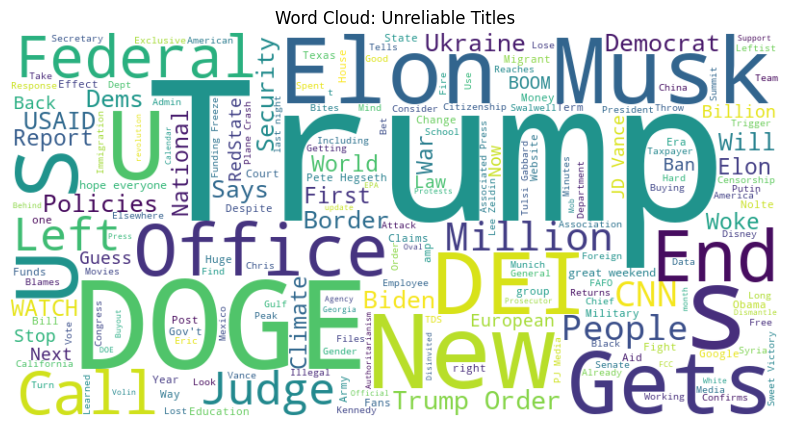

For is_unreliable=False:
Number of rows in filtered_df: 8553
Number of non-NaN titles: 8553
Sample titles:
954    More recent books/essays on anarchism for the ...
961    Surveying anarchists for my college final! Hel...
962                        Looking for reading resources
963                                 Long Live Tranarchy!
964                                              He won.
Name: title_original, dtype: object
Length of text: 589819


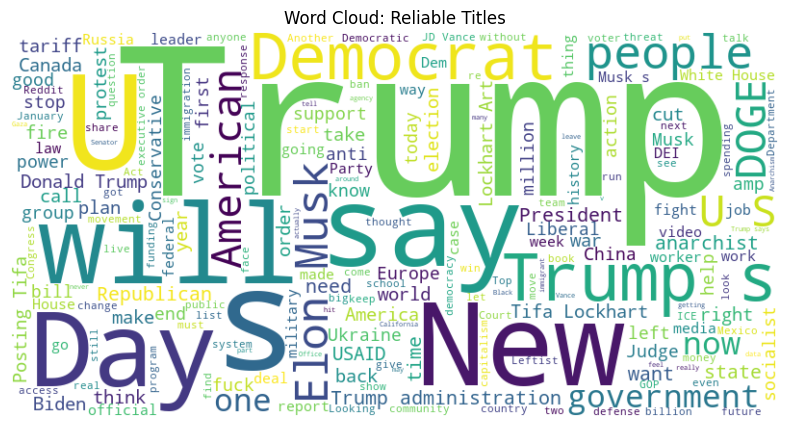

In [ ]:
for is_unreliable in [True, False]:

    filtered_df = combined_df[combined_df['is_unreliable_domain'] == is_unreliable]
    titles = filtered_df['title_original'].dropna()

    print(f"For is_unreliable={is_unreliable}:")
    print(f"Number of rows in filtered_df: {len(filtered_df)}")
    print(f"Number of non-NaN titles: {len(titles)}")
    if len(titles) > 0:
        print(f"Sample titles:\n{titles.head()}")
        text = ' '.join(titles)
        print(f"Length of text: {len(text)}")
    else:
        print("No titles available to generate word cloud.")

    if len(titles) > 0:
        text = ' '.join(titles)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud: {"Unreliable" if is_unreliable else "Reliable"} Titles')
        plt.show()
    else:
        print("Skipping word cloud generation due to lack of data.")

In [82]:
fig = px.box(
    combined_df, x='is_unreliable_domain', y='title_sentiment',
    title='Title Sentiment by Domain Reliability',
    labels={'is_unreliable_domain': 'Is Unreliable Domain', 'title_sentiment': 'Sentiment Score'},
    color='is_unreliable_domain'
)
fig.show()
fig.write_html('title_sentiment.html')

In [60]:
sentiment_trend = combined_df.groupby('date_original')['title_sentiment'].mean().reset_index()
fig = px.line(
    sentiment_trend, x='date_original', y='title_sentiment',
    title='Average Title Sentiment Over Time',
    labels={'date_original': 'Date', 'title_sentiment': 'Average Sentiment'}
)
fig.update_traces(mode='lines+markers')
fig.show()
fig.write_html("avg_title_sentiment_over_time.html")

## 5. Author Behavior and Reliability
Purpose: Flag suspicious authors (e.g., bots, high-frequency posters) linked to unreliable content.

In [61]:
top_unreliable_authors = combined_df[combined_df['is_unreliable_domain'] == True]['author_original'].value_counts().head(10).reset_index()
top_unreliable_authors.columns = ['author', 'post_count']

fig = px.bar(
    top_unreliable_authors, x='author', y='post_count',
    title='Top Authors Posting Unreliable Domains',
    labels={'author': 'Author', 'post_count': 'Number of Posts'},
    color='post_count', color_continuous_scale='Oranges'
)
fig.show()
fig.write_html("top_authors_posting_unreliable_domains.html")


In [62]:
# Filter for rows where a crosspost exists
crosspost_df = combined_df[(combined_df['id_crosspost'].notna()) & (combined_df['id_crosspost'] != 'no_crosspost')].copy()
print(len(crosspost_df))
print(combined_df[['author_original', 'author_crosspost', 'is_unreliable_domain', 'title_original']].head())

# Create a directed graph
G = nx.DiGraph()

# Add edges with attributes from the DataFrame
for _, row in crosspost_df.iterrows():
    G.add_edge(row['author_original'], row['author_crosspost'],
               is_unreliable=row['is_unreliable_domain'],
               title=row['title_original'])

# Generate node positions using a spring layout
pos = nx.spring_layout(G)

# Calculate node sizes based on degree (number of connections)
node_sizes = [G.degree(node) * 10 for node in G.nodes()]

# Prepare edge traces for reliable and unreliable posts
edge_x_reliable, edge_y_reliable = [], []
edge_x_unreliable, edge_y_unreliable = [], []
edge_hover_texts = []

# Collect edge data for plotting and hovering
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]  # Starting node position
    x1, y1 = pos[edge[1]]  # Ending node position
    if edge[2]['is_unreliable']:
        edge_x_unreliable.extend([x0, x1, None])
        edge_y_unreliable.extend([y0, y1, None])
    else:
        edge_x_reliable.extend([x0, x1, None])
        edge_y_reliable.extend([y0, y1, None])
    edge_hover_texts.append(f"Crosspost: {edge[2]['title']}<br>From: {edge[0]}<br>To: {edge[1]}")

# Reliable edges (blue)
edge_trace_reliable = go.Scatter(
    x=edge_x_reliable, y=edge_y_reliable,
    line=dict(width=1, color='blue'),
    hoverinfo='none',
    mode='lines'
)

# Unreliable edges (red)
edge_trace_unreliable = go.Scatter(
    x=edge_x_unreliable, y=edge_y_unreliable,
    line=dict(width=1, color='red'),
    hoverinfo='none',
    mode='lines'
)

# Prepare node trace
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(size=node_sizes, color='lightblue', line_width=2),
    text=[f'User: {node}<br>Connections: {G.degree(node)}' for node in G.nodes()]
)

# Add arrows to indicate direction (triangle markers near the end of edges)
arrow_x, arrow_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]  # Start of edge
    x1, y1 = pos[edge[1]]  # End of edge
    # Position arrowhead slightly before the end of the edge
    arrow_x.append(x1 - (x1 - x0) * 0.1)
    arrow_y.append(y1 - (y1 - y0) * 0.1)

arrow_trace = go.Scatter(
    x=arrow_x, y=arrow_y,
    mode='markers',
    marker=dict(symbol='triangle-up', size=5, color='black'),
    hoverinfo='none'
)

# Create invisible markers at edge midpoints for hover functionality
edge_mid_x, edge_mid_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    # Midpoint for hover interaction
    edge_mid_x.append((x0 + x1) / 2)
    edge_mid_y.append((y0 + y1) / 2)

edge_hover_trace = go.Scatter(
    x=edge_mid_x, y=edge_mid_y,
    mode='markers',
    marker=dict(size=1, color='rgba(0,0,0,0)'),  # Invisible markers
    hoverinfo='text',
    text=edge_hover_texts
)

# Create the figure with all traces
fig = go.Figure(
    data=[edge_trace_reliable, edge_trace_unreliable, node_trace, arrow_trace, edge_hover_trace],
    layout=go.Layout(
        title='User Crossposting Network with Domain Reliability',
        showlegend=False,
        hovermode='closest',
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

# Display the interactive graph
fig.show()

237
         author_original author_crosspost  is_unreliable_domain                                     title_original
954             Pete0730     no_crosspost                 False  More recent books/essays on anarchism for the ...
961      obamalizard2004     no_crosspost                 False  Surveying anarchists for my college final! Hel...
962         Tweedledee72     Tweedledee72                 False                      Looking for reading resources
963  cumminginsurrection     no_crosspost                 False                               Long Live Tranarchy!
964            ullrs_bow     no_crosspost                 False                                            He won.


In [63]:
from pyvis.network import Network

# Create a PyVis network
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", directed=True)

# Copy node attributes before conversion
for node in G.nodes():
    # Calculate node degree once
    degree = G.degree(node)
    # Add node with size based on degree
    G.nodes[node]['size'] = degree * 5  # Adjust multiplier as needed
    G.nodes[node]['title'] = f'User: {node}<br>Connections: {degree}'
    G.nodes[node]['label'] = str(node)  # Make sure node has a visible label

# Add edge colors and information
for source, target, attr in G.edges(data=True):
    if attr['is_unreliable']:
        G[source][target]['color'] = 'red'
        G[source][target]['title'] = f"UNRELIABLE: {attr['title']}"
    else:
        G[source][target]['color'] = 'blue'
        G[source][target]['title'] = f"RELIABLE: {attr['title']}"

# Convert NetworkX graph to PyVis
net.from_nx(G)

# Add physics and interaction options
net.show_buttons(filter_=['physics'])

# Generate and display the interactive visualization
net.save_graph("crosspost_network.html")


In [64]:
flair_counts = combined_df['is_unreliable_domain'].value_counts().reset_index()
flair_counts.columns = ['is_unreliable_domain', 'count']

fig = px.bar(
    flair_counts, x='is_unreliable_domain', y='count',
    title='Count of Posts by Reliability',
    labels={'is_unreliable_domain': 'Is Unreliable Domain', 'count': 'Count'},
    color='is_unreliable_domain'
)
fig.show()

In [65]:
fig = px.histogram(
    combined_df, x='author_post_count', color='is_unreliable_domain',
    nbins=50, title='Author Post Count Distribution by Reliability',
    labels={'author_post_count': 'Number of Posts', 'is_unreliable_domain': 'Unreliable Domain'},
    barmode='overlay'
)
fig.show()

### Few more plots

In [66]:
# Categorize subreddits by subscriber count
combined_df['subreddit_size'] = pd.qcut(combined_df['subreddit_subscribers_original'],
                                        q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

# Aggregate data by date and subreddit size
temporal_data = combined_df.groupby(['date_original', 'subreddit_size']).agg(
    avg_upvotes=('ups_original', 'mean')
).reset_index()

fig = px.line(
    temporal_data, x='date_original', y='avg_upvotes', color='subreddit_size',
    title='Average Upvotes Over Time by Subreddit Size',
    labels={'date_original': 'Date', 'avg_upvotes': 'Average Upvotes', 'subreddit_size': 'Subreddit Size'},
    hover_data=['date_original', 'avg_upvotes']
)
fig.update_traces(mode='lines+markers')  # Add markers for clarity
fig.show()
fig.write_html("avg_upvote_over_time_by_subreddit_size.html")

C:\Users\aryan\AppData\Local\Temp\ipykernel_16924\4107289180.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Hypothesis testing

Null Hypothesis (H₀): The average number of upvotes for unreliable posts is less than or equal to that for reliable posts (μ_unreliable ≤ μ_reliable).

Alternative Hypothesis (H₁): The average number of upvotes for unreliable posts is greater than that for reliable posts (μ_unreliable > μ_reliable).

P-value < 0.05: You reject the null hypothesis, meaning there’s strong evidence that unreliable posts get more upvotes on average.

P-value ≥ 0.05: You fail to reject the null hypothesis, meaning there isn’t enough evidence to conclude unreliable posts get more upvotes.

In [67]:
unreliable_ups = combined_df[combined_df['is_unreliable_domain'] == True]['ups_original']
reliable_ups = combined_df[combined_df['is_unreliable_domain'] == False]['ups_original']

# Perform a two-sample t-test (Welch’s t-test for unequal variances)
t_stat, p_value_two_tailed = stats.ttest_ind(unreliable_ups, reliable_ups, equal_var=False)

# Adjust for a one-tailed test (testing if unreliable > reliable)
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - p_value_two_tailed / 2

# Set significance level
alpha = 0.05

# Interpret the results
if p_value_one_tailed < alpha:
    print(f"Reject the null hypothesis. Unreliable posts have significantly more upvotes (p-value: {p_value_one_tailed:.4f})")
else:
    print(f"Fail to reject the null hypothesis. No significant difference (p-value: {p_value_one_tailed:.4f})")

# Print averages for context
print(f"Average upvotes for unreliable posts: {unreliable_ups.mean():.2f}")
print(f"Average upvotes for reliable posts: {reliable_ups.mean():.2f}")

Fail to reject the null hypothesis. No significant difference (p-value: 0.5455)
Average upvotes for unreliable posts: 372.25
Average upvotes for reliable posts: 389.34


In [68]:
# Step 1: List all columns and their types
print("Columns and their types:")
print(combined_df.dtypes.to_string())

Columns and their types:
subreddit_original                          object
title_original                              object
selftext_original                           object
author_original                             object
created_utc_original                datetime64[ns]
id_original                                 object
permalink_original                          object
subreddit_id_original                       object
subreddit_subscribers_original               int64
ups_original                                 int64
downs_original                               int64
score_original                               int64
upvote_ratio_original                      float64
num_comments_original                        int64
total_awards_received_original               int64
num_crossposts_original                      int64
is_self_original                              bool
is_video_original                             bool
domain_original                             object
url_or

In [69]:
# Step 2: Identify relevant numerical columns (int64 and float64)
numerical_cols = combined_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['subreddit_subscribers_original', 'ups_original', 'downs_original', 'score_original', 'upvote_ratio_original', 'num_comments_original', 'total_awards_received_original', 'num_crossposts_original', 'pwls_original', 'wls_original', 'ups_crosspost', 'hour_crosspost', 'title_length', 'selftext_length', 'title_sentiment', 'selftext_sentiment', 'comment_upvote_ratio', 'award_upvote_ratio', 'ups_per_subscriber', 'comments_per_subscriber', 'time_lag_hours', 'ups_difference', 'author_post_count'], dtype='object')

In [70]:
exclude_cols = ['pwls_original', 'wls_original', 'hour_original', 'hour_crosspost', 'time_lag_hours']
relevant_numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

In [71]:
print("Relevant numerical columns for analysis:")
print(relevant_numerical_cols)
print("\n")

Relevant numerical columns for analysis:
['subreddit_subscribers_original', 'ups_original', 'downs_original', 'score_original', 'upvote_ratio_original', 'num_comments_original', 'total_awards_received_original', 'num_crossposts_original', 'ups_crosspost', 'title_length', 'selftext_length', 'title_sentiment', 'selftext_sentiment', 'comment_upvote_ratio', 'award_upvote_ratio', 'ups_per_subscriber', 'comments_per_subscriber', 'ups_difference', 'author_post_count']




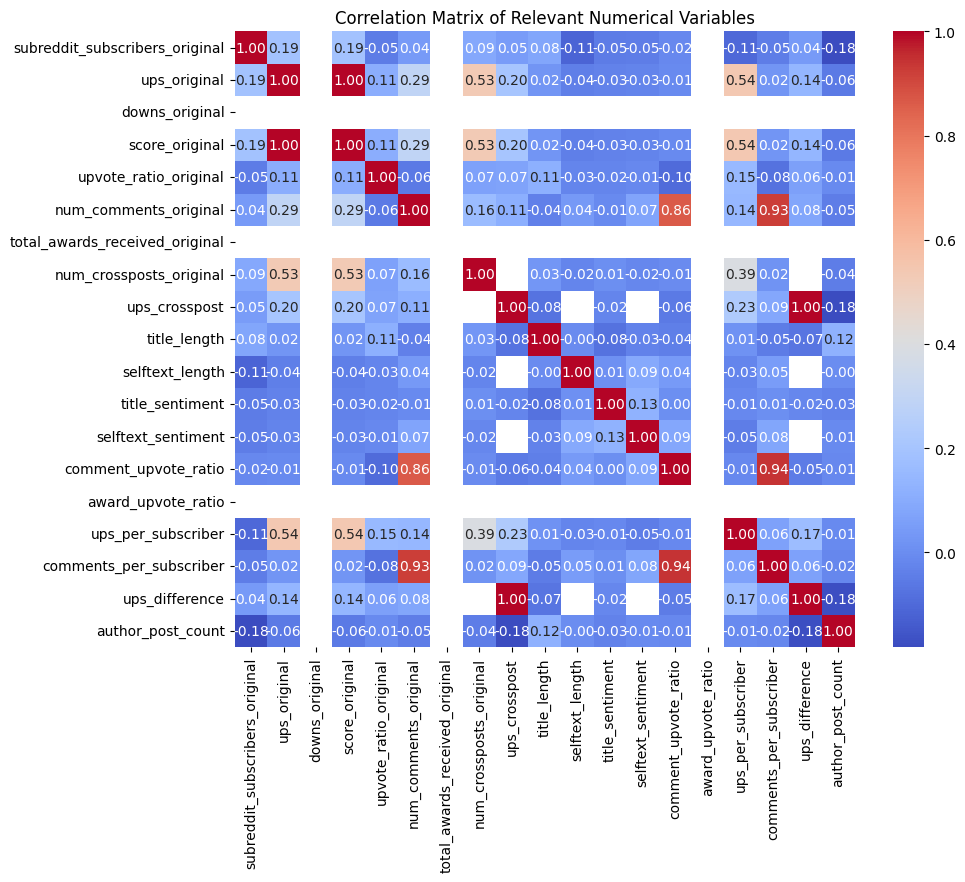

Overall Statistics:
       subreddit_subscribers_original  ups_original  downs_original  score_original  upvote_ratio_original  num_comments_original  total_awards_received_original  num_crossposts_original  ups_crosspost  title_length  selftext_length  title_sentiment  selftext_sentiment  comment_upvote_ratio  award_upvote_ratio  ups_per_subscriber  comments_per_subscriber  ups_difference  author_post_count
count                    8.799000e+03   8799.000000          8799.0     8799.000000            8799.000000            8799.000000                          8799.0              8799.000000     237.000000   8799.000000      8799.000000      8799.000000         8799.000000           8799.000000              8799.0         8799.000000              8799.000000      237.000000        8799.000000
mean                     1.476751e+06    388.866348             0.0      388.866348               0.861548              68.252756                             0.0                 0.188090    2391.3

In [72]:
if len(relevant_numerical_cols) == 0:
    print("No relevant numerical columns found for analysis.")
else:
    # Correlation Analysis
    corr_matrix = combined_df[relevant_numerical_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Relevant Numerical Variables')
    plt.show()

    # Statistical Summaries
    overall_stats = combined_df[relevant_numerical_cols].describe()
    print("Overall Statistics:")
    print(overall_stats)
    print("\n")

    # Grouped statistics
    if 'is_unreliable_domain' in combined_df.columns:
        grouped_stats = combined_df.groupby('is_unreliable_domain')[relevant_numerical_cols].agg(['mean', 'median', 'std'])
        print("Grouped Statistics by Domain Reliability:")
        print(grouped_stats)
        print("\n")

        # Visualize with box plots
        if 'ups_original' in relevant_numerical_cols:
            fig = px.box(combined_df, x='is_unreliable_domain', y='ups_original',
                         title='Upvotes Distribution by Domain Reliability',
                         color='is_unreliable_domain',
                         labels={'is_unreliable_domain': 'Is Unreliable Domain', 'ups_original': 'Upvotes'})
            fig.show()
    else:
        print("Column 'is_unreliable_domain' not found. Skipping grouped analysis and box plot.")